In [1]:
from lib_reader.reader11.parse_grid_data import parse_grid_data_new
# from analysis_grid_data import cal_sipm_iv_vbr_data, plot_iv_vbr_curve

from addict import Dict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

/home/wqd/repo/python/grid_calibration/lib_reader/src/lib_reader/reader10/parity_check.py:27: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def crc16_xmodem_nd(data):
/home/wqd/repo/python/grid_calibration/lib_reader/src/lib_reader/reader10/parity_check.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def bcc_nd(data):


In [2]:
filenum = '043'
folder = '/home/wqd/repo/python/grid_calibration/data/11B'

all_names = os.listdir(folder)
for name in all_names:
    if name[:3] == filenum:
        if 'observe' in name:
            observe_name = os.path.join(folder, name)
            print('observe_name: ', observe_name)
        elif 'hk' in name:
            hk_name = os.path.join(folder, name)
            print('hk_name: ', hk_name)

observe_name:  /home/wqd/repo/python/grid_calibration/data/11B/043_observe_30_ch1.dat
hk_name:  /home/wqd/repo/python/grid_calibration/data/11B/043_hk_30_ch1.dat


In [3]:
wf_data_l = Dict(parse_grid_data_new(observe_name,data_tag='grid1x_wf_packet',endian='MSB')[0])
hk_data = Dict(parse_grid_data_new(hk_name,data_tag='hk_grid1x_packet',endian='MSB')[0])

========> parsing file  /home/wqd/repo/python/grid_calibration/data/11B/043_observe_30_ch1.dat
header
utc
pps_for_utc
timestamp_for_pps
channel_n
event_number
sample_length
waveform_data
timestamp
data_max
data_base
CRC
tail
                 name  start  size  len
0              header      0     4    1
1                 utc      4     4    1
2         pps_for_utc      8     4    1
3   timestamp_for_pps     12     8    1
4           channel_n     20     2    1
5        event_number     22     4    1
6       sample_length     26     2    1
7       waveform_data     28     2  256
8           timestamp    540     8    1
9            data_max    548     2    1
10          data_base    550     2    1
11                CRC    554     2    1
12               tail    556     4    1
========> parsing file  /home/wqd/repo/python/grid_calibration/data/11B/043_hk_30_ch1.dat
header
utc_time
cpu_temperature
daq_temperature_i2c1_0x49
latest_received_cmd
latest_received_cmd_arg
latest_received_cmd_ind

ch0 count: 4518
ch1 count: 50530
ch2 count: 6445
ch3 count: 11086


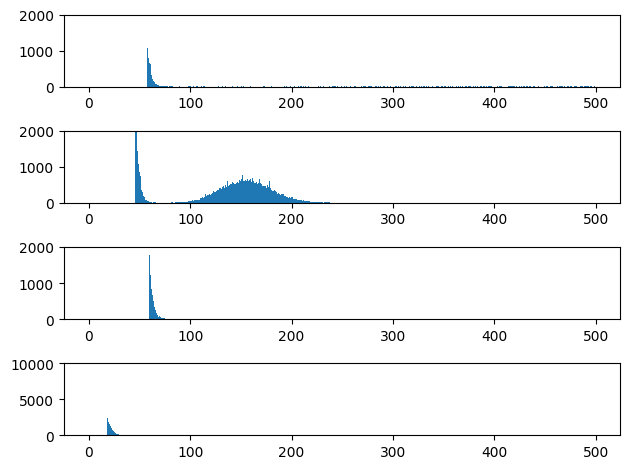

In [4]:
# Spectrum plotting code by PXF
bin_width = 1
range_min = 0
range_max = 500

bins = range(range_min, range_max, bin_width)

fig,axs = plt.subplots(4)
counts0, bins, patches = axs[0].hist(wf_data_l.data_max[wf_data_l.channel_n==0][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts1, bins, patches = axs[1].hist(wf_data_l.data_max[wf_data_l.channel_n==1][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts2, bins, patches = axs[2].hist(wf_data_l.data_max[wf_data_l.channel_n==2][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)
counts3, bins, patches = axs[3].hist(wf_data_l.data_max[wf_data_l.channel_n==3][:]-np.mean(wf_data_l.data_base[wf_data_l.channel_n==1][:]/4),bins=bins)

# axs[0].set_xlim(0,1000)
# axs[1].set_xlim(0,1000)
# axs[2].set_xlim(0,1000)
# axs[3].set_xlim(0,1000)

axs[0].set_ylim(0,2000)
axs[1].set_ylim(0,2000)
axs[2].set_ylim(0,2000)
axs[3].set_ylim(0,10000)

plt.tight_layout()
print('ch0 count: {:d}'.format(int(sum(counts0[:]))))
print('ch1 count: {:d}'.format(int(sum(counts1[:]))))
print('ch2 count: {:d}'.format(int(sum(counts2[:]))))
print('ch3 count: {:d}'.format(int(sum(counts3[:]))))

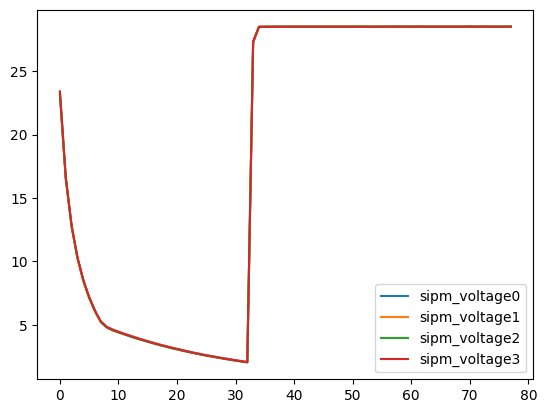

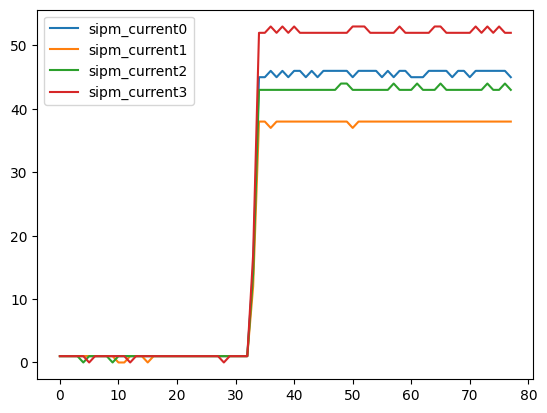

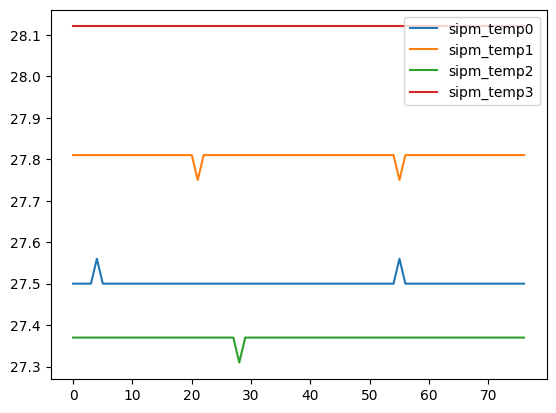

In [5]:
plt.plot(hk_data.sipm_voltage0[:]/1000)
plt.plot(hk_data.sipm_voltage1[:]/1000)
plt.plot(hk_data.sipm_voltage2[:]/1000)
plt.plot(hk_data.sipm_voltage3[:]/1000)
plt.legend(['sipm_voltage0','sipm_voltage1','sipm_voltage2','sipm_voltage3'])
plt.show()

plt.plot(hk_data.sipm_current0[:])
plt.plot(hk_data.sipm_current1[:])
plt.plot(hk_data.sipm_current2[:])
plt.plot(hk_data.sipm_current3[:])
plt.legend(['sipm_current0','sipm_current1','sipm_current2','sipm_current3'])
plt.show()

plt.plot(hk_data.sipm_temp0[1:]/100 - 273.15)
plt.plot(hk_data.sipm_temp1[1:]/100 - 273.15)
plt.plot(hk_data.sipm_temp2[1:]/100 - 273.15)
plt.plot(hk_data.sipm_temp3[1:]/100 - 273.15)
plt.legend(['sipm_temp0','sipm_temp1','sipm_temp2','sipm_temp3'])
plt.show()
